### Dataset 2: Breast Cancer Coimbra
Dataset originated from UC Irvine Breast Cancer Coimbra dataset, including:\
Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP-1.\
All quantitative. \
Data source: [Breast Cancer Coimbra](https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra).

Analysis Guidance Sources:\
[Breast Cancer Classification](https://www.kaggle.com/code/niteshyadav3103/breast-cancer-classification#K-Neighbors-Classifier-(KNN))\
[Breast Cancer Analysis and Prediction](https://www.kaggle.com/code/vincentlugat/breast-cancer-analysis-and-prediction#2.-Exploratory-Data-Analysis-(EDA))\
[Exercise: SHAP Values](https://www.kaggle.com/code/dansbecker/exercise-shap-values)

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Reading Cleaned Dataset
file_path = os.path.join('..', 'datasets', 'uci_original_breast_cancer_cleaned.csv')
# file_path = os.path.join('..', 'datasets', 'breast_cancer_coimbra_cleaned.csv')
print("Reading Path:", os.path.abspath(file_path))

if os.path.exists(file_path):
    df_original = pd.read_csv(file_path)
    print("Reading Succeeded. Data Shape:",df_original.shape)
    display(df_original.head())
else:
    print("File Not Found. Make sure the dataset is under the 'datasets' folder.")

Reading Path: /home/frankli/Desktop/breast-cancer-eda/datasets/uci_original_breast_cancer_cleaned.csv
Reading Succeeded. Data Shape: (116, 10)


/home/frankli/Desktop/breast-cancer-eda/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [2]:
# Splitting Features and Target from the original DataFrame
features = df_original.drop(columns=['Classification'])
target = df_original['Classification']

In [3]:
# Normalizing Features
means = features.mean()
stds = features.std()
features_normalized = (features - means) / stds

df_normalized = pd.concat([features_normalized, target], axis=1)
output_filename = os.path.join('..', 'datasets', 'normalized', 'breast_cancer_coimbra_cleaned_normalized.csv')
df_normalized.to_csv(output_filename, index=False)
display(df_normalized.head())

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,-0.577289,-0.813147,-1.233869,-0.725591,-0.611629,-0.928307,-0.069918,-0.543161,-0.339777,1
1,1.594902,-1.372795,-0.257184,-0.685066,-0.545872,-0.926394,-0.694338,-0.860481,-0.190398,1
2,1.532839,-0.887912,-0.301578,-0.547697,-0.462745,-0.452257,1.790232,-0.439752,0.057963,1
3,0.663963,-1.237933,-0.923106,-0.674041,-0.571729,-0.872237,-0.440036,-0.158181,1.137781,1
4,1.781089,-1.289009,-0.257184,-0.641958,-0.518830,-1.038178,-0.783482,-0.334899,0.691715,1


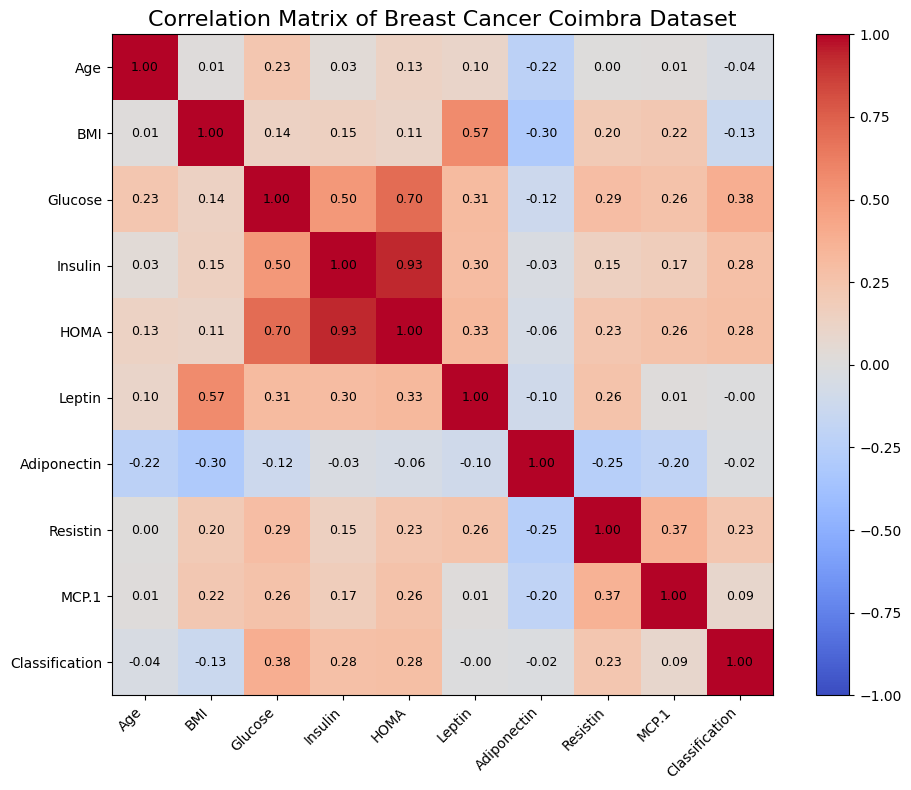

In [4]:
# Visualizing Using the Heatmap
corr = df_original.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=9)

ax.set_title("Correlation Matrix of Breast Cancer Coimbra Dataset", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_31319/1143197677.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([benign_data, malignant_data], labels=['Healthy', 'Patient'], widths=0.6)
/tmp/ipykernel_31319/1143197677.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([benign_data, malignant_data], labels=['Healthy', 'Patient'], widths=0.6)
/tmp/ipykernel_31319/1143197677.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([benign_data, malignant_data], labels=['Healthy', 'Patient'], widths=0.6)
/tmp/ipykernel_31319/1143197677.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of

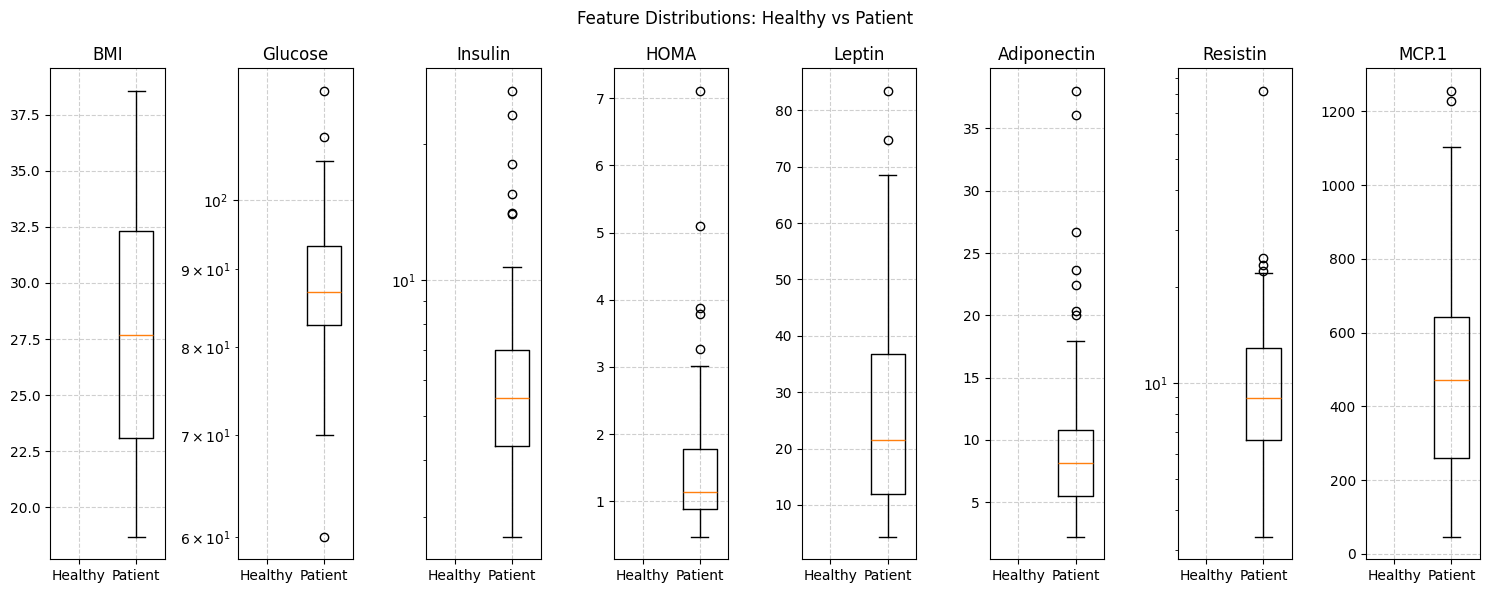

In [5]:
# Boxplots for Feature Distributions
import matplotlib.pyplot as plt

dataframe = df_original  

features = [col for col in dataframe.columns if col not in ['Age', 'Classification']]
selected_features = ['BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

fig, axes = plt.subplots(nrows=1, ncols=len(selected_features), figsize=(15, 6))

for idx, feature in enumerate(selected_features):
    benign_data = dataframe[dataframe['Classification'] == 0][feature]
    malignant_data = dataframe[dataframe['Classification'] == 1][feature]
    
    axes[idx].boxplot([benign_data, malignant_data], labels=['Healthy', 'Patient'], widths=0.6)
    axes[idx].set_title(feature)
    axes[idx].grid(True, linestyle='--', alpha=0.6)
    
    # Set y-axis to logarithmic scale for specific features 
    # Use log scale here for Insuline, Resistin, and Glucose may have very skewed distributions
    if feature in ['Insulin', 'Resistin', 'Glucose']:
        axes[idx].set_yscale('log')

plt.suptitle("Feature Distributions: Healthy vs Patient")
plt.tight_layout()
plt.show()

/tmp/ipykernel_31319/742905187.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_original.groupby(['Age_Group', 'Classification']).size().unstack()


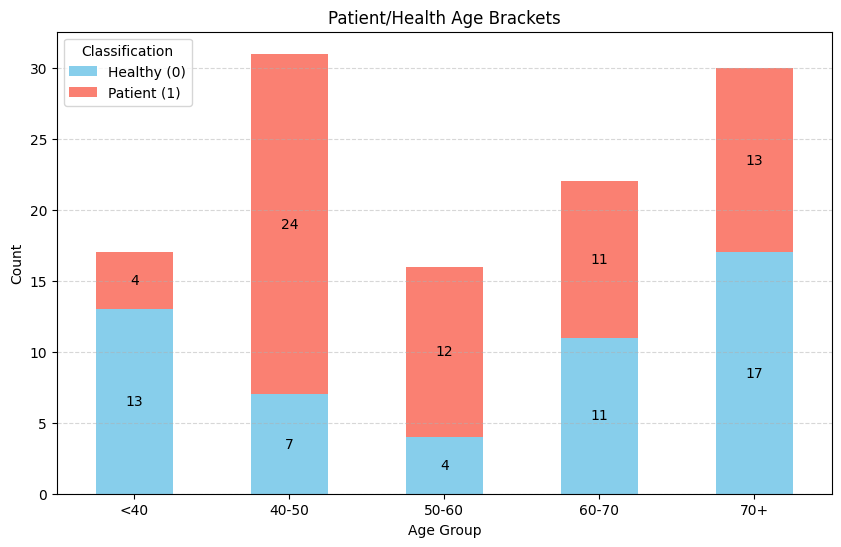

In [6]:
# Bar Chart for Age Brackets vs Malignancy Prevalence

bins = [0, 40, 50, 60, 70, 100]
labels_age = ['<40', '40-50', '50-60', '60-70', '70+']
df_original['Age_Group'] = pd.cut(df_original['Age'], bins=bins, labels=labels_age)

age_counts = df_original.groupby(['Age_Group', 'Classification']).size().unstack()

ax = age_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Patient/Health Age Brackets')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Healthy (0)', 'Patient (1)'], title='Classification')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        ax.text(x + width/2, y + height/2, f'{int(height)}', 
                ha='center', va='center')

plt.show()

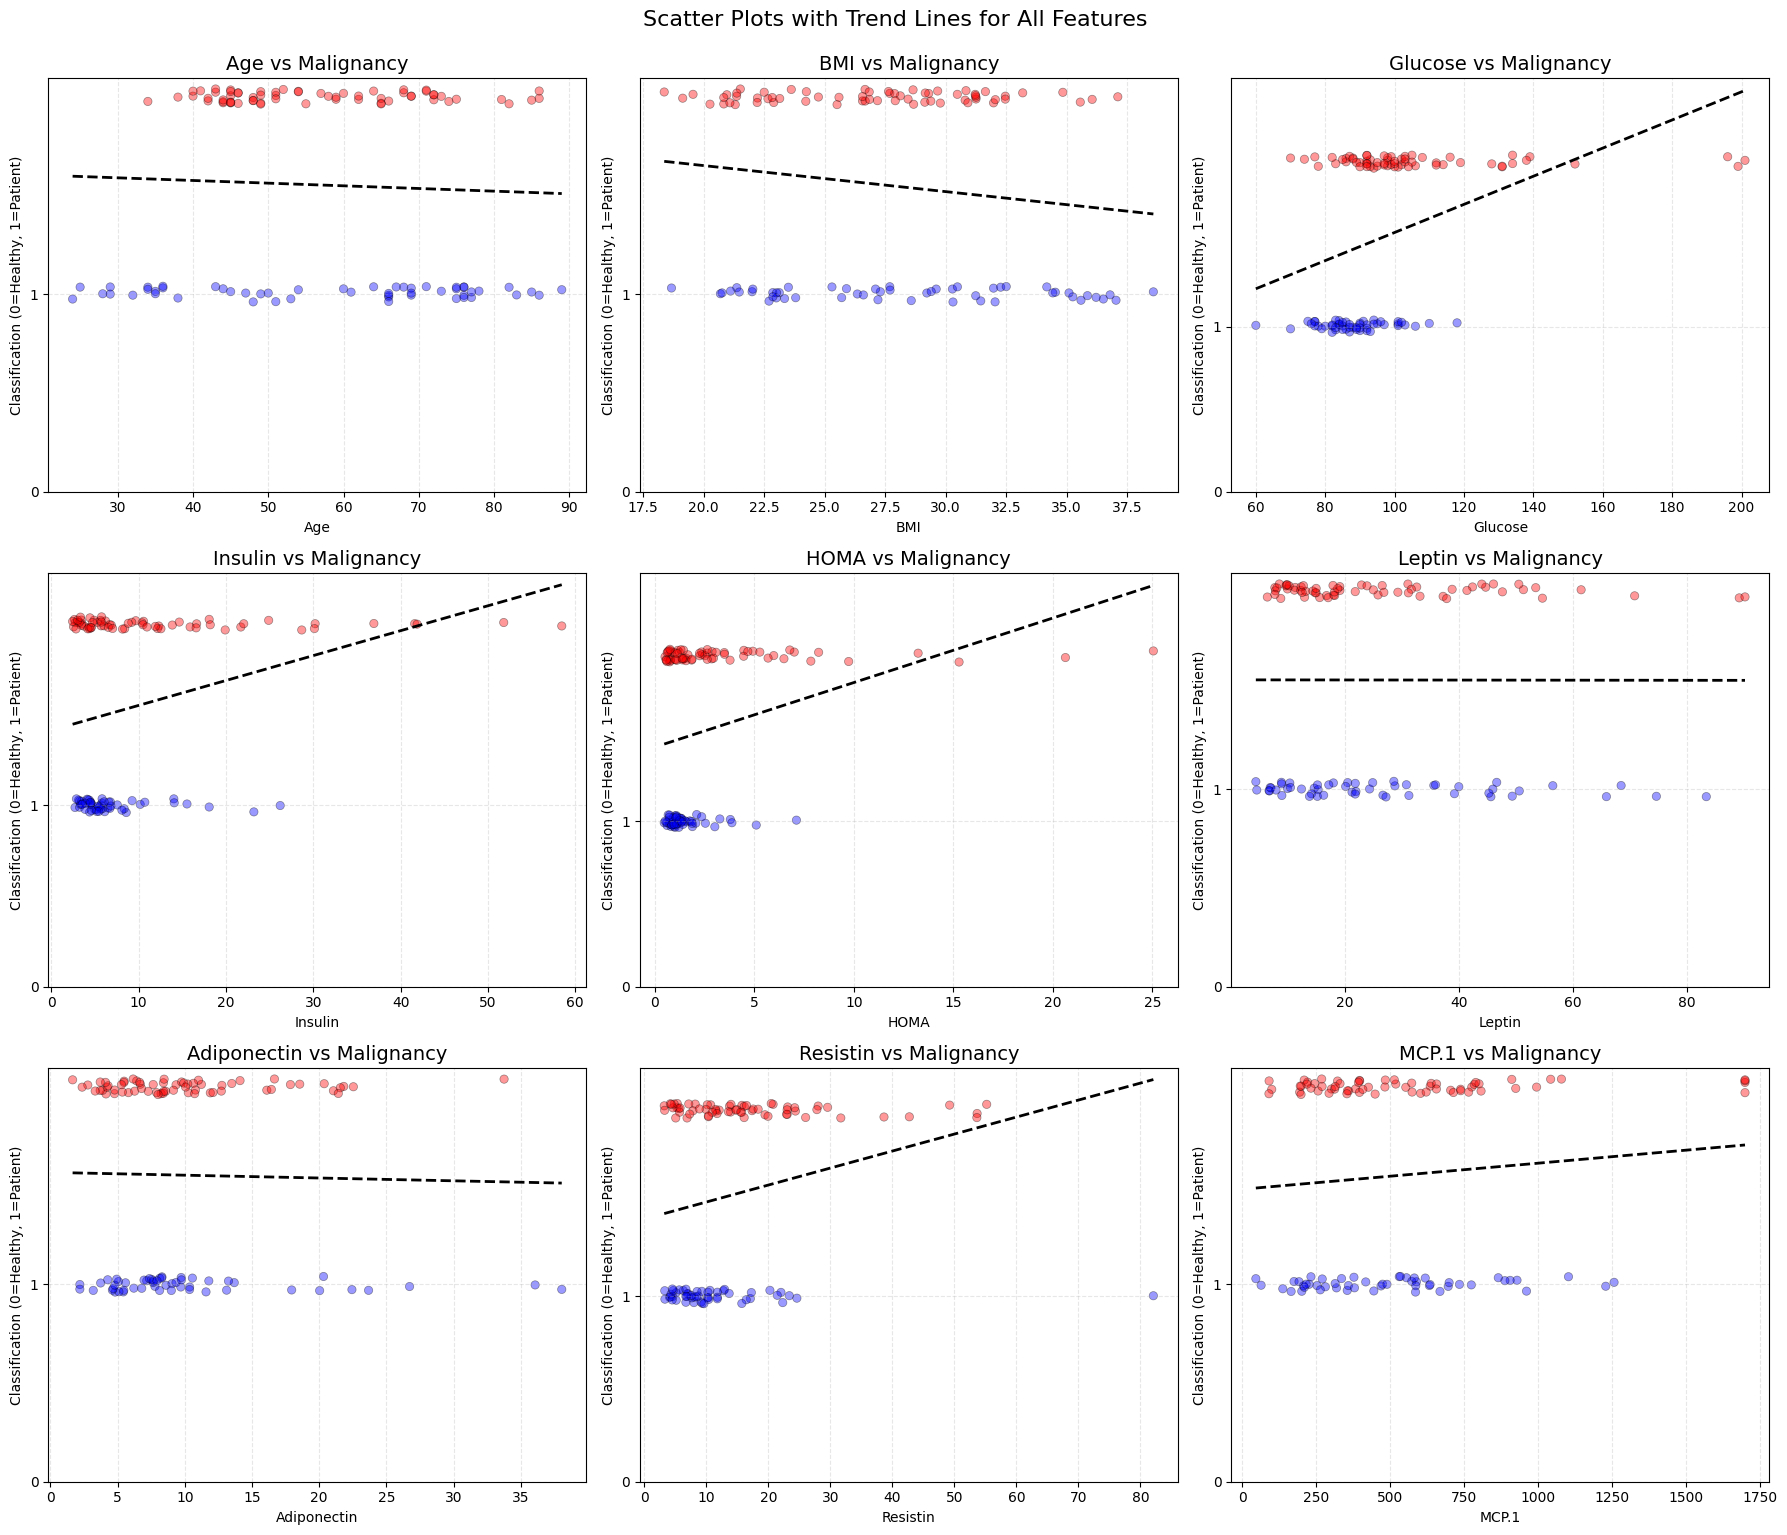

In [7]:
# Scatter Plots with Trend Lines for All Features

features = [col for col in df_original.columns if col not in ['Classification', 'Age_Group']]
n_features = len(features)

fig, axes = plt.subplots(3, 3, figsize=(18, 5 * 3))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    x = df_original[feature]
    y = df_original['Classification']

    y_jitter = y + 0.08 * np.random.rand(len(y)) - 0.04

    scatter = ax.scatter(x, y_jitter, c=y, cmap='bwr', alpha=0.4, edgecolors='k', linewidth=0.5)
    m, b = np.polyfit(x, y, 1)

    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = m * x_line + b

    ax.plot(x_line, y_line, color='black', linestyle='--', linewidth=2, label='Trend')

    ax.set_title(f'{feature} vs Malignancy', fontsize=14)
    ax.set_xlabel(feature)
    ax.set_ylabel('Classification (0=Healthy, 1=Patient)')
    ax.set_yticks([0, 1])
    ax.grid(True, linestyle='--', alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Scatter Plots with Trend Lines for All Features", y=1.02, fontsize=16)
plt.show()

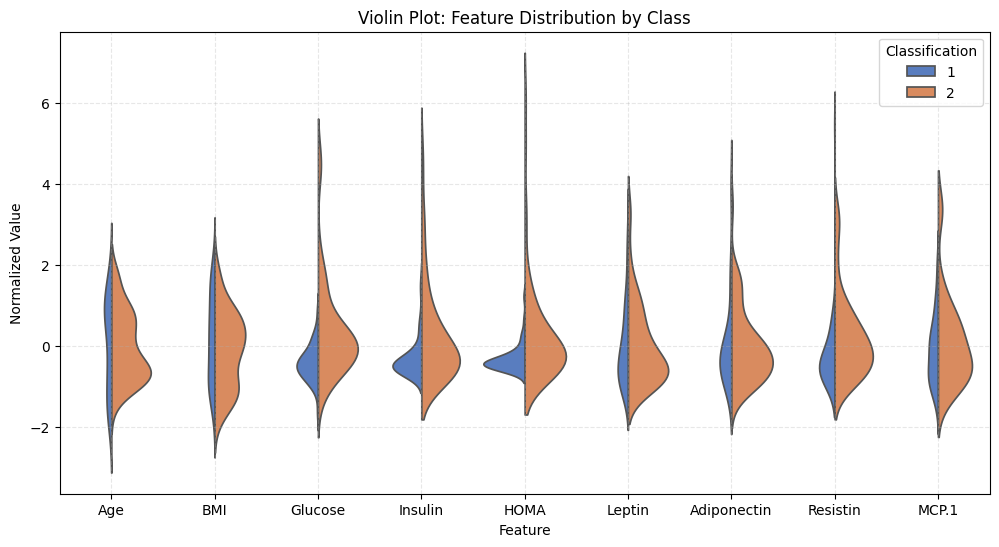

In [8]:
# Modified from Breast Cancer Analysis and Prediction by Vincent Lugat
# https://www.kaggle.com/code/vincentlugat/breast-cancer-analysis-and-prediction/notebook#2.-Exploratory-Data-Analysis-(EDA)

key_features = ['Age', 'BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1'] 
valid_features = [col for col in key_features if col in df_normalized.columns]

df_melted = df_normalized.melt(id_vars=['Classification'], 
                               value_vars=valid_features, 
                               var_name='Feature', 
                               value_name='Normalized Value')

plt.figure(figsize=(12, 6))

sns.violinplot(x='Feature', y='Normalized Value', hue='Classification', 
               data=df_melted, split=True, inner=None, palette="muted")

plt.title('Violin Plot: Feature Distribution by Class')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Logistic Regression: 71.67%
KNN (k=1): 71.67%
SVM (RBF, C=3.0): 55.15%
Naive Bayes: 63.71%
Decision Tree: 73.64%
Random Forest: 72.73%
Gradient Boosting: 77.05%


/tmp/ipykernel_31319/246576492.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_results, palette='viridis')


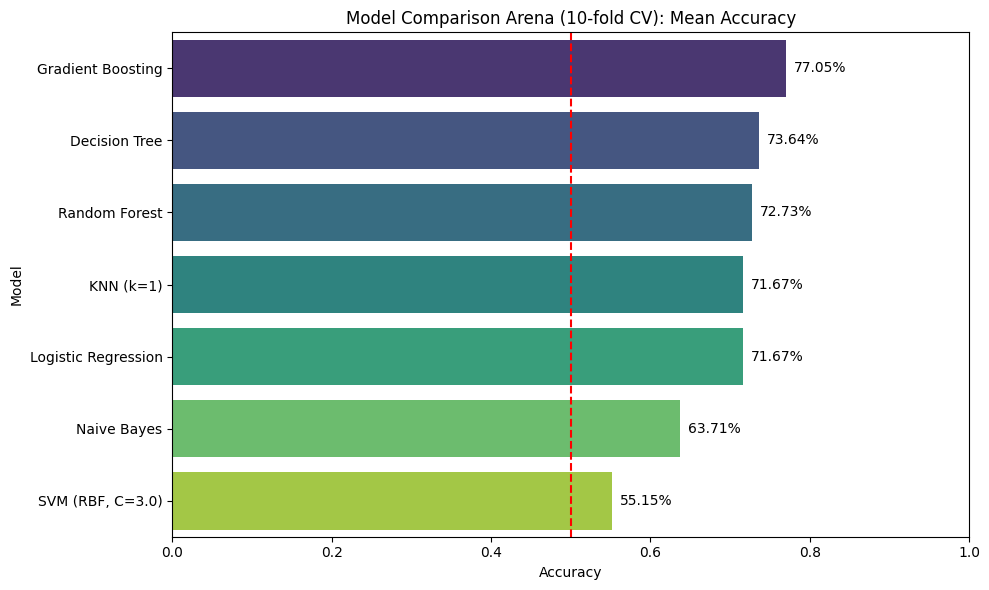

In [9]:
# Modified from Breast Cancer Classification by Nitesh Yadav
# https://www.kaggle.com/code/niteshyadav3103/breast-cancer-classification#Logistic-Regression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare X and y from the existing data
X = features_normalized
y = target

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN (k=1)', KNeighborsClassifier(n_neighbors=1)),
    ('SVM (RBF, C=3.0)', SVC(kernel='rbf', C=0.01)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

results = []
names = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    accs = []
    for train_idx, valid_idx in skf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        
        m = clone(model)
        m.fit(X_train, y_train)
        y_pred = m.predict(X_valid)
        
        accs.append(accuracy_score(y_valid, y_pred))
    
    mean_acc = np.mean(accs)
    results.append(mean_acc)
    names.append(name)
    print(f"{name}: {mean_acc:.2%}")

plt.figure(figsize=(10, 6))

df_results = pd.DataFrame({'Model': names, 'Accuracy': results})
df_results = df_results.sort_values(by='Accuracy', ascending=False)

sns.barplot(x='Accuracy', y='Model', data=df_results, palette='viridis')

plt.xlim(0, 1.0)
plt.title('Model Comparison Arena (10-fold CV): Mean Accuracy')
plt.axvline(x=0.5, color='red', linestyle='--', label='Random Guess')
for i, v in enumerate(df_results['Accuracy']):
    plt.text(v + 0.01, i, f'{v:.2%}', va='center')

plt.tight_layout()
plt.show()


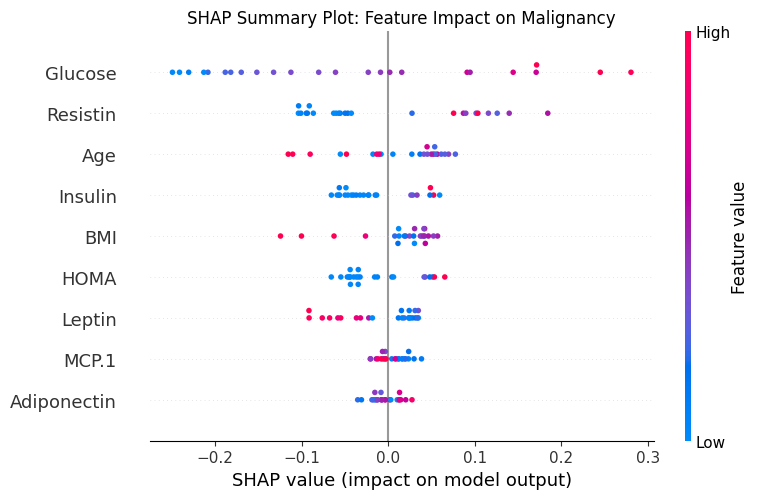

Top Influential Feature: Glucose


In [10]:
# Modified from Exercise: SHAP Values by DanB
# https://www.kaggle.com/code/dansbecker/exercise-shap-values

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_vals_target = shap_values[1]
else:
    if len(shap_values.shape) == 3:
        shap_vals_target = shap_values[:, :, 1]
    else:
        shap_vals_target = shap_values

plt.figure(figsize=(10, 8))
plt.title("SHAP Summary Plot: Feature Impact on Malignancy")
shap.summary_plot(shap_vals_target, X_test, show=False)
plt.show()

import numpy as np
if isinstance(shap_vals_target, np.ndarray):
    mean_shap = np.abs(shap_vals_target).mean(axis=0)
    top_feature_idx = np.argsort(mean_shap)[-1]
    top_feature_name = X_test.columns[top_feature_idx]
    print(f"Top Influential Feature: {top_feature_name}")
